<a href="https://colab.research.google.com/github/fandims/testgit/blob/master/computer_vision1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
import numpy as np
from tensorflow import keras

In [2]:
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [3]:
xs = np.array([1.0,3.0,7.0,9.0,10.0], dtype = float)
ys = np.array([2.0,6.0,14.0,18.0,20.0], dtype = float)

In [5]:
model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 441ms/step - loss: 177.5429
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 0.1243
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0139
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0137
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0136
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0135
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0133
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0132
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0131
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 12/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0127
Epoch 13/500
1/1 [==============================] - 0s 5m

In [9]:
print(model.predict([1000000]))

[[1997465.4]]


In [10]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [11]:
mnist = tf.keras.datasets.fashion_mnist

In [12]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  17  12  13  70   

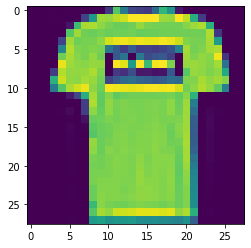

In [15]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[1])
print(training_images[1])
print(training_labels[1])

In [16]:
training_images=training_images/255
test_images=test_images/255

In [28]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(1204, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [36]:
callbacks = myCallback()
model.compile(optimizer=tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2041 - accuracy: 0.9229

Reached 60% accuracy so cancelling training!


In [37]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3527 - accuracy: 0.8817


[0.35267168283462524, 0.8816999793052673]

In [35]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('loss')< 0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

In [26]:
classifications = model.predict(test_images)
print(classifications[0])

[2.9453415e-06 2.6403860e-08 2.1384985e-06 1.5435548e-07 1.0885938e-07 3.5609152e-02 3.3035452e-05 1.6010821e-02 3.8083814e-05 9.4830358e-01]


In [27]:
print(test_labels[0])

9
